<b>DOWNLOAD THE DATA</b> - pg(43) 
<br>
    <p>In a typical project ther would be many loopholes and administration <br>
    things to go through but in this project just get the compressed housing.tgz <br>
    file and extract the housing.csv from it.</p>
    <p>Creating a small function to retrieve and extract the data will help to later <br>
    automate the process and even set up scheduled times. This would also help to work <br>
    on all machines instead of just this one.</p>
    <p>The function will serve to retrieve the file from the url, check to see if it <br>
    has a certain directory to store it in, if not it will create it and then it will <br>
    extract the .csv from the .tgz and place it in the directory.</p>


In [120]:
import os  # work with os stuff
import tarfile  # used to work with tar files
from six.moves import urllib  # gets urls

import time  # with with time and sleep

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"  # the place to get the datasets from
housing_path = os.path.join("datasets", "housing")  # the directory this dataset will be saved in
housing_url = download_root + "datasets/housing/housing.tgz"  # the full url of the dataset getting

# two default values of the url and the directory of storage
def fetch_housing_data(url=housing_url, path_=housing_path):
    # ".isdir(<path>)" checks if it has the directory given, this checks where it is, if in
    # if it doesn't ".makedirs(<path>)" will make the directory with the diven path where it is
    if not os.path.isdir(path_):
        os.makedirs(path_)
    tgz_path = os.path.join(path_, "housing.tgz")  # make a open file for what .tgz file will go
    urllib.request.urlretrieve(url, tgz_path)  # get the data from url and put it in the open file
    housing_tgz = tarfile.open(tgz_path)  # take the now full data file and open it as a tarfile, need to work with it
    housing_tgz.extractall(path=path_)  # extract the file contained in it, this is the .csv file which will automatically be added to directory given
    housing_tgz.close()  # close the file because not working with it now
    # try to remove file after use
    # work on this more
    try:
        # works now for some reason
        os.remove(housing_tgz.name)
        print(str(housing_tgz.name) + " removed.")
    except PermissionError as e:
        print(e)

In [121]:
fetch_housing_data()

C:\Users\David Millard\PycharmProjects\helloWorld\ML\chap_two\datasets\housing\housing.tgz removed.


<p>The next function will serve to convert the .csv file gotten above to a pandas dataframe.</p>

In [122]:
import pandas as pd  # import pandas

# function to just convert the csv to a dataframe
# has a default value path_ of the housing_path
def convert_to_df(path_=housing_path):
    path = os.path.join(path_, "housing.csv")  # get the path of csv file
    return pd.read_csv(path)  # return the dataframe

<b>TAKE A QUICK LOOK AT THE DATA STRUCTURE</b> - pg(45)<br> 
    <p>Using the <i>.head()</i>, <i>.tail()</i>, and <i>iloc / loc</i> it can be seen the <br>
    beginning middle and end of the df.</p>

In [123]:
df = convert_to_df()
df.head()  # beginning

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [124]:
df.loc[10000:10005, "longitude": ]  # middle

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10000,-121.08,39.02,13.0,1839.0,275.0,752.0,270.0,4.2031,209600.0,INLAND
10001,-121.07,39.05,10.0,1813.0,311.0,827.0,287.0,3.6087,182100.0,INLAND
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
10003,-121.03,39.05,12.0,1875.0,307.0,806.0,283.0,3.9185,195200.0,INLAND
10004,-121.06,39.04,14.0,1651.0,279.0,633.0,261.0,4.2802,194800.0,INLAND
10005,-121.06,39.04,15.0,1999.0,287.0,585.0,246.0,5.5161,361900.0,INLAND


In [125]:
df.tail()  # end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [126]:
df.info()  # gets information on rows, columns, types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p>total_bedrooms are 20,433 meaning some of the districts (207) are missing them. <br>
This will need to be a problem taken care of later because a NAN value won't work here.</p>
<p>Almost all attributes/colums are float/numerical except ocean_proximity which is object.<br>
Knowing this a csv it is likely text and looking through df it shows to be a catagorial mark.</p>

In [127]:
df["ocean_proximity"].value_counts()  # couts all values of ocean_proximity and returns a series of categories and counts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [128]:
df.describe()  # returns a dataframe describing the statistics on numerical columns/attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<p>Another good way to get a feel for data working with is to plot a histogram.<br>
<i>A histogram shows the number of instances (vertical axis) that have a given value range (horizontal axis).</i></p>

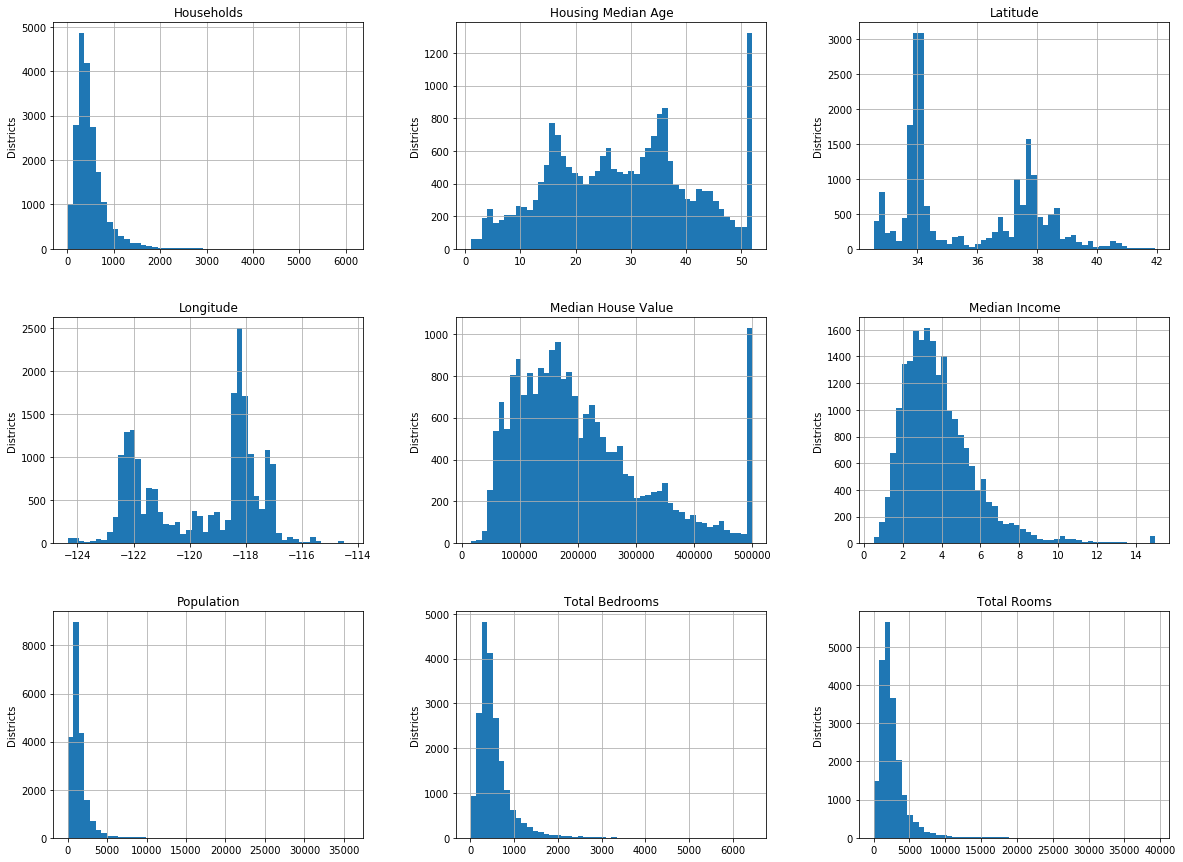

In [129]:
%matplotlib inline  
# this is used to show graphs in jupyter lab
# matplotlib requires somewhere to tell it how and where to render
# jupyter does this automatically but other places need to be told, mayber like the command below
import matplotlib.pyplot as plt  # import plotting stuff

for i in df.hist(bins=50, figsize=(20, 15)):  # use the .hist() function to create histograms of each series of districts and its attributes, then loop through
    for e in i:  
        # making it look pretty
        e.set_ylabel("Districts")
        word_list = e.get_title().split("_")
        word_list = [word.capitalize() for word in word_list]  # use list comprehension instead of enumerate indexing
        word = " ".join(word_list)
        e.set_title(word)
        
plt.show()

<h4>Analyzing the Data and Graphs</h4>

<p>1.</p>
<p>
On the landscape of the districts it looks like there are larger communities <br>
all houses build off of, this is possible in the longitude and latitude. The median income, <br>
total rooms, total bedrooms, population, and households follw a somewhat bell curve shape. <br>
</p>
<p>2.</p>
<p>
The median income is capped at 15.0 and .5 to accomodate rich and poor outliers. <br>
These numbers are in terms of 10,000 dollars = 1 unit.<br>
<i>Pre-processed numbers are common in ML, it isn't a problem but it is something to understand.</i>
</p>
<p>3.</p>
<p>
The median house age and values were both capped as well showing the sudden spike a the right sides. <br>
This could be a series issue if predictions need to made of places above those caps (500,000 and 52). <br>
There are two main options: <br>
&emsp;a. Get the data for those places. <br>
&emsp;b. Remove the districts from the traing set and test set. The system should be ok with instances <br>
&emsp;&emsp;over 500,000 because the algorithm will be trained well enough to scale ok.
</p>
<p>4.</p>
<p>
These attributes will have different scales. <br>
<i>This will be discussed later in the chapter when exploring scaling.</i>
</p>
<p>5.</p>
<p>
Histograms are <u>tail heavy</u>. They extend much farther to right of median than to the left. <br>
This makes it much marder for ML algorithms to detect decent patterns, (somewhat graph bias). <br>
<i>Will be trying to transform these attributes later on in the chapter to have more of a bell-shape distributions.</i>
</p>

<b>CREATE A TEST SET</b> - pg(48)
<p>It may be weird to set aside test data right now before moving on but if you look <br>
into the data too much, the human brain tends to pick up easily on patterns and may <br>
select specific data. Some bias could be there is a pattern of outliers so you <br>
could select only a few to keep the algorithm working as you want but this would <br>
over-estimate the gereralization and then make it too optimistic when in reality <br>
the system isn't so. This is called <i>snooping bias</i>.</p>

<p>Theoretically creating a test set is simple, just randomly pick 20% of the test set.<br>
This function will take 20% random districts from df and return the testing.</p>

In [130]:
import numpy as np  # get numpy for its work on series/df of data

# take the dataframe and ratio of all data frame to use
def split_train_test (data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # create a randomly indexed series the same length as the input df
    test_set_size = int(len(data) * test_ratio)  # get how any instances will be used, a percentage of full df
    """this gets 20% test, 80% train"""
    test_indices = shuffled_indices[:test_set_size]  # allocate from the beginning to the test_set_size as the test size, this is in the randomized df
    train_indices = shuffled_indices[test_set_size:]  # allocate from the test_set_size to the end as the training size, this is in the randomized df
    """
    then return two df, both using iloc to return a df of only the instances in eah set
    iloc allows to make a df of all instances of an array using the the row indexes
    iloc[<numpy-array>] - allows to choose specific instances as specificed by the object, it could as for just two elements
    iloc still keeps its functionality with dataframes
    """
    return data.iloc[train_indices], data.iloc[test_indices]

In [131]:
training_set, testing_set = split_train_test(df, .20)

In [132]:
print(f"{len(training_set)} + {len(testing_set)} = {len(testing_set) + len(training_set)} ... full set")  # showing the length add up to the df total

16512 + 4128 = 20640 ... full set


In [133]:
training_set.head()  # show the randomization

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
260,-122.20,37.78,52.0,2300.0,443.0,1225.0,423.0,3.5398,158400.0,NEAR BAY
4828,-118.31,34.04,52.0,1277.0,285.0,954.0,334.0,2.5833,234600.0,<1H OCEAN
6114,-117.90,34.13,37.0,1801.0,422.0,1564.0,425.0,3.1597,133000.0,<1H OCEAN
11588,-118.01,33.78,19.0,2648.0,478.0,1160.0,452.0,5.9357,207400.0,<1H OCEAN
5520,-118.39,33.97,46.0,2198.0,352.0,839.0,335.0,6.5778,350800.0,<1H OCEAN


In [144]:
testing_set.head()  # show the randomization

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9252,-120.08,36.96,36.0,2074.0,349.0,954.0,363.0,3.1136,73800.0,INLAND
11403,-117.92,33.73,14.0,5147.0,1182.0,3171.0,1126.0,3.9929,225800.0,<1H OCEAN
13962,-116.88,34.25,11.0,1089.0,198.0,230.0,90.0,4.9643,176000.0,INLAND
10742,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,500001.0,<1H OCEAN
19083,-122.48,38.32,42.0,2106.0,533.0,1141.0,445.0,3.1129,149300.0,<1H OCEAN


<p>Though there is an issue with the above solution to setting the sets.<br>
Everytime the program is re-run the test and train sets will change.</p>
<p>There are a few ways to potentially solve this: <br>
&emsp;- <br>
&emsp;- d<br>
</p>
<p>This route is the strongest because even if the dataset is refreshed and there <br>
is more, the indenifiers will stay the same and it will still have the original <br>
sets and the new sets integrated with their original ratios.</p>

In [135]:
from zlib import crc32

# this works with hash and the maximun hash value for any other is 2^32
# the gets a series of the id of each instance and then uses crc32 to return the bit value of each instance, these will never change
print(f"first {crc32(np.int64(df.iloc[0:1, df.index[0]:df.index[1]]))}, second {crc32(np.int64(df.iloc[1:2, df.index[1]:df.index[2]]))}")

first 2455459239, second 3568612187


In [140]:
count = 0

df_index = df.reset_index()

for i in df_index['index']:
    t = crc32(np.int64(i))  # crc32 creates a unique 32bit identifier from a certian indentifier in the dataframe, this being the index indentifier
    if ((2 ** 32 * .2) > t):
        count += 1
        
print(count)
        

4128


In [142]:
df_index.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
